In [1]:
!pip install transformers

In [19]:
#Import packages
import pandas as pd
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

#Load Data
data = pd.read_csv('/Users/juan.gallego/kami-summer-internship-2023/sampled_df.csv')

#Load Image
img = Image.open("/Users/juan.gallego/kami-summer-internship-2023/ps4.jpg")

#Select Model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
#Select Processor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [20]:
#Select the column and select the labels in norwegian
labels=list(data.iloc[:,-1].unique())

In [21]:
labels

['Vesker, kofferter og bager : : Trillekoffert',
 'Klær, sko og tilbehør: Klær: Yttertøy',
 'Elektronikk og hvitevarer: Hvitevarer: Kjøleskap',
 'Møbler og interiør: Møbler: Spisebord',
 'Møbler og interiør: Møbler: Salongbord',
 'Briller og solbriller: : Solbriller med styrke',
 'Hjem, hage og oppussing: Hage og uteområde: Drivhus',
 'Hjem, hage og oppussing: Hage og uteområde: Annet',
 'Klokker: : Analog klokke',
 'Elektronikk og hvitevarer: Spill og konsoll: Spillkonsoll',
 'Kunst og antikviteter: : ',
 'Møbler og interiør: Møbler: Annet',
 'Elektronikk og hvitevarer: Hvitevarer: Tørketrommel',
 'Baby- og barneutstyr: : Barnevogn',
 'Hjem, hage og oppussing: Baderomsutstyr: Dusjkabinett/vegg',
 'Elektronikk og hvitevarer: Diverse småelektronikk: Annet',
 'Elektronikk og hvitevarer: Husholdningsapparater: Annet',
 'Kjøretøy og tilbehør: Annet: ',
 'Møbler og interiør: Møbler: Seng',
 'Elektronikk og hvitevarer: Husholdningsapparater: Støvsuger',
 'Sport og friluftsliv: Sykkel og tilb

In [22]:
#Labels in English
categories = [
       'Bags, suitcases and bags: : Rolling suitcase',
       'Clothing, shoes and accessories: Clothes: Outerwear',
       'Electronics and appliances: Appliances: Refrigerator',
       'Furniture and interior: Furniture: Dining table',
       'Furniture and interior: Furniture: Coffee table',
       'Glasses and sunglasses: : Prescription sunglasses',
       'Home, garden and renovation: Garden and outdoor area: Greenhouse',
       'Home, garden and renovation: Garden and outdoor area: Other',
       'Watches: : Analog watch',
       'Electronics and appliances: Games and console: Game console',
       'Art and antiques: : ',
       'Furniture and interior: Furniture: Other',
       'Electronics and appliances: Appliances: Tumble dryer',
       "Baby and children's equipment: : Pram",
       'Home, garden and renovation: Bathroom equipment: Shower cabinet/wall',
       'Electronics and appliances: Various small electronics: Other',
       'Electronics and appliances: Household appliances: Other',
       'Vehicles and accessories: Other: ',
       'Furniture and interior: Furniture: Bed',
       'Electronics and appliances: Household appliances: Vacuum cleaner',
       'Sports and outdoor life: Bicycle and accessories: Bicycle',
       'Electronics and appliances: Mobile phone, tablet and accessories: Tablet',
       'Electronics and appliances: Computers and accessories: Desktop PC',
       'Electronics and appliances: Mobile phone, tablet and accessories: Other',
       'Leisure, hobby and entertainment: : Other',
       'Glasses and sunglasses: : Sunglasses without prescription',
       'Clothing, shoes and accessories: Clothes: Jacket',
       'Electronics and appliances: Appliances: Dishwasher',
       'Bags, suitcases and bags: : Suitcase',
       'Glasses and sunglasses: : Other',
       'Glasses and sunglasses: : Everyday glasses with prescription',
       'Glasses and sunglasses: : Reading glasses',
       'Electronics and appliances: Other: ',
       'Furniture and interior: Other: ',
       'Electronics and appliances: TV and sound: Head-/earphones',
       'Electronics and appliances: Appliances: Washing machine',
       'Home, garden and renovation: Other: ',
       'Electronics and appliances: Computers and accessories: Computer monitor',
       'Furniture and interior: Furniture: Sofa',
       'Electronics and appliances: Appliances: Stove/oven',
       'Watches: : Smartwatch',
       'Electronics and appliances: Mobile phone, tablet and accessories: Mobile phone',
       'Glasses and sunglasses: : Progressive',
       'Electronics and appliances: Appliances: Cooktop',
       'Electronics and appliances: Computers and accessories: Laptop',
       'Electronics and appliances: TV and sound: TV'
]


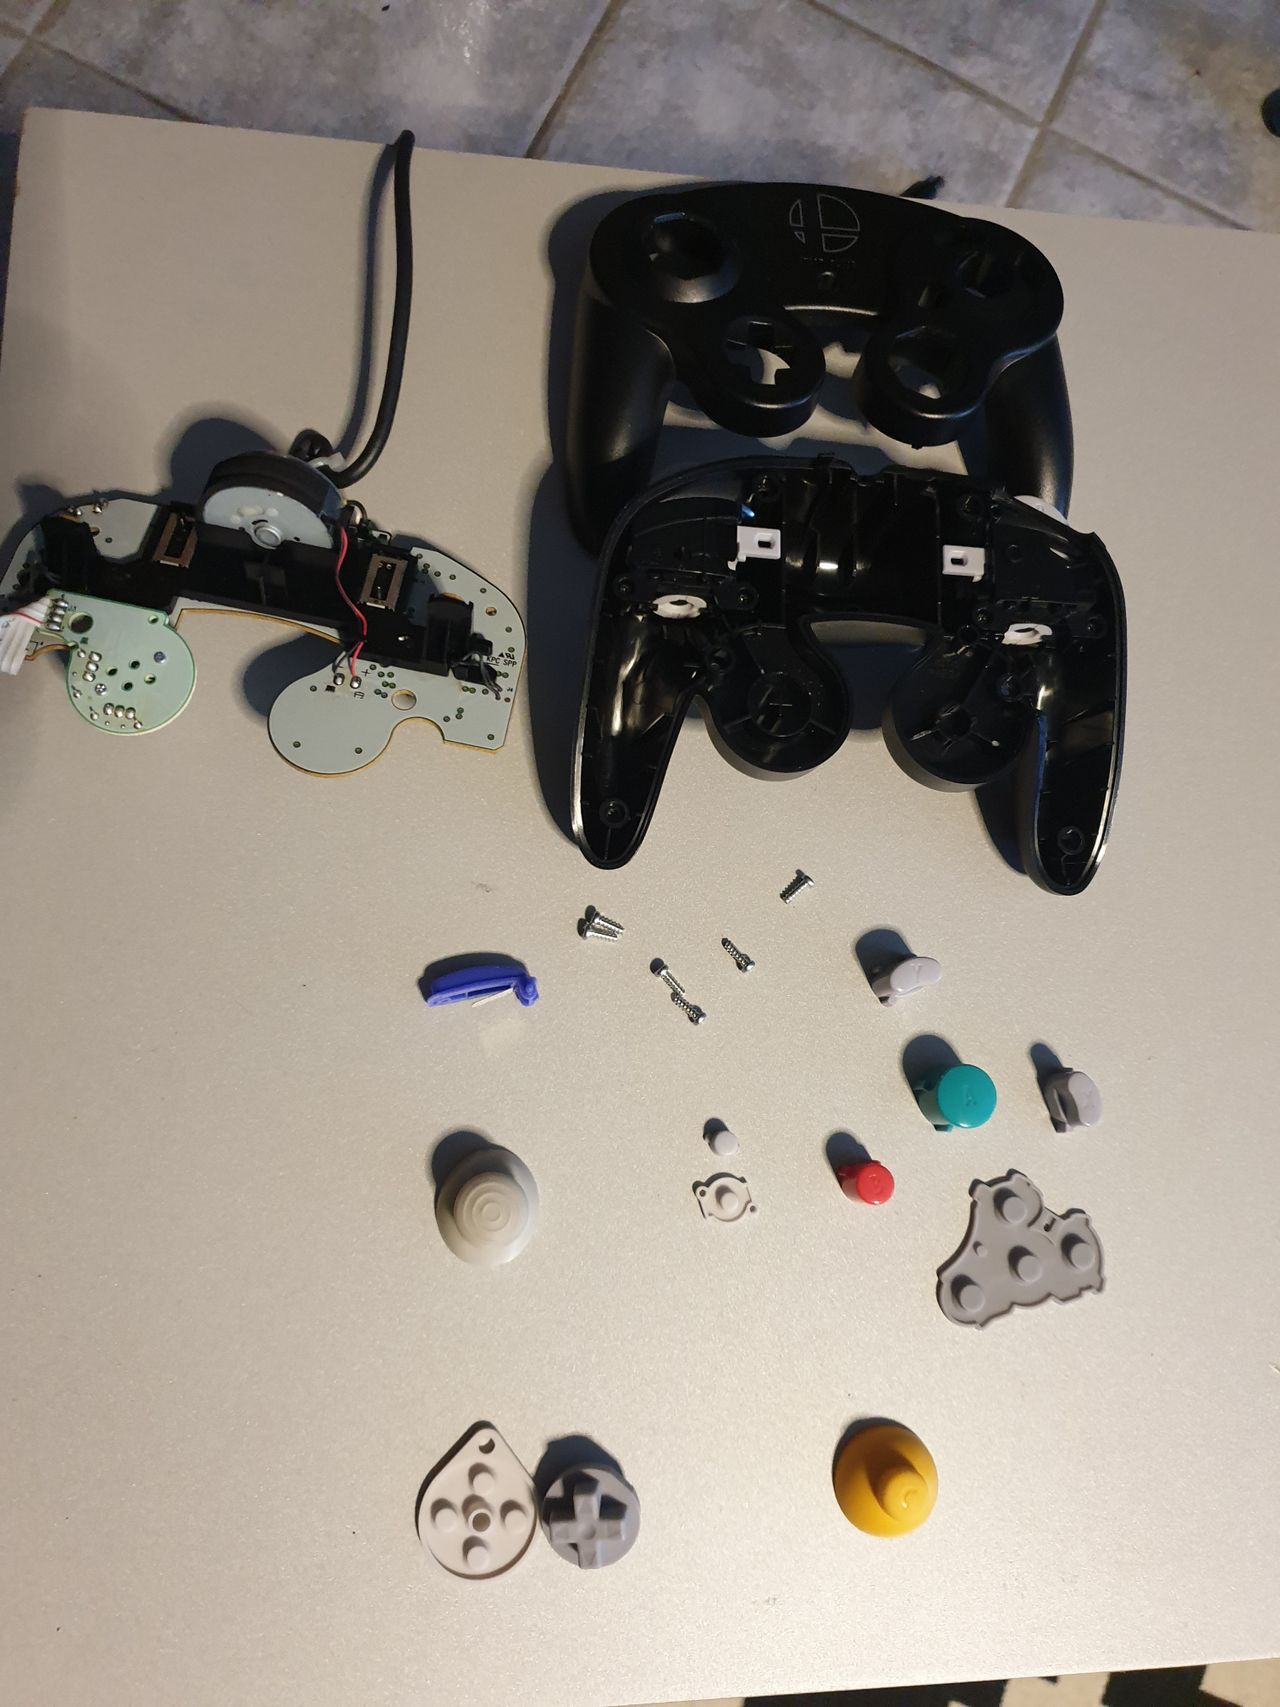

In [23]:
img

In [24]:
def CLIP_MODEL(image, labels_english, labels_norwegian):
    if type(image) == str:
        url = image #Load a sample image

        image = Image.open(requests.get(url, stream=True).raw)

    inputs = processor(text=labels_english, images=image, return_tensors="pt", padding=True) #text = to the labels in English

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # Return logits as probabilities (softmax)  

    highest_prob = probs.max()
    highest_prob_index = probs.argmax()

    #find the label with the highest prob
    label = labels_norwegian[highest_prob_index]
    return label 

CLIP_MODEL(img, categories, labels)


'Elektronikk og hvitevarer: Spill og konsoll: Spillkonsoll'